In [1]:
# Imports

import heatmap
import torch
import matplotlib.pyplot as plt
import logging
logging.getLogger('matplotlib').setLevel(logging.ERROR)

In [2]:
# Loading the datasets

# setting images_idx=[id_1,id_2,...], you can select images id1, id_2,... 
# images_idx=[] will use all images from the dataset
# dataset_name can be 'stackgen', 'stackmix', or any valid folder name in data/ containing images 
my_data = heatmap.load_dataset(dataset_name='stackgen', images_idx = [])

In [3]:
# Loading the model

# masked=True corresponds to the masked-VGG16 
custom_model = heatmap.load_model(masked=True)

In [4]:
# Computing CAM-based saliency maps

# the following CAM-based methods are supported: GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, LayerCAM
my_method = "GradCAM"
# class_target argument specifies which ImageNet-1k class (out of 1000) to compute the CAM heatmap for. 
# class_target=None means that CAM will be computed for the class with the highest predicted score.
# layers_idx = [-3] corresponds to the output of the last convolutional block.
my_heatmaps = heatmap.get_heatmaps(custom_model, 
                                  my_data, layers_idx = [-3], 
                                  method=my_method, 
                                  class_target = None)


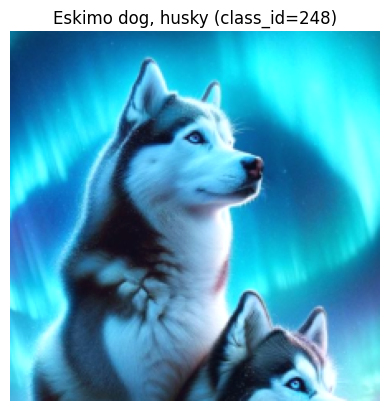

In [5]:
# Looking at a specific image
index_of_chosen_img = 44
heatmap.plot_image(custom_model, 
                   my_data, 
                   idx = index_of_chosen_img, 
                   save=False)

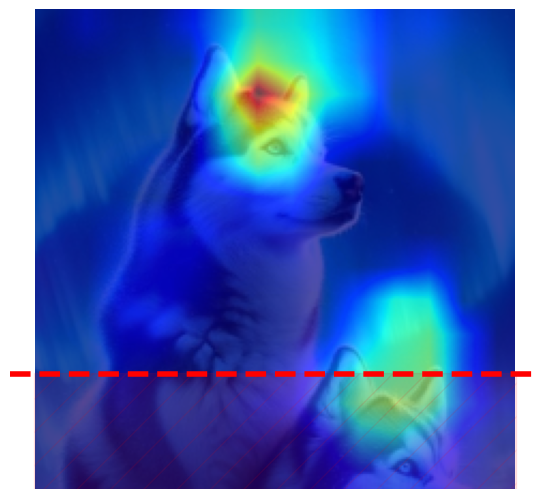

In [6]:
# Visualizing the heatmap

# if masked=True, the network's predictions do not depend on pixel values in the red area 
# in that case, non-zero saliency maps in that area is not faithful to the model
# set save=True to save the plot into figures/
heatmap.plot_heatmap_with_wall(my_heatmaps, 
                               my_data, 
                               idx = index_of_chosen_img, 
                               save=False)

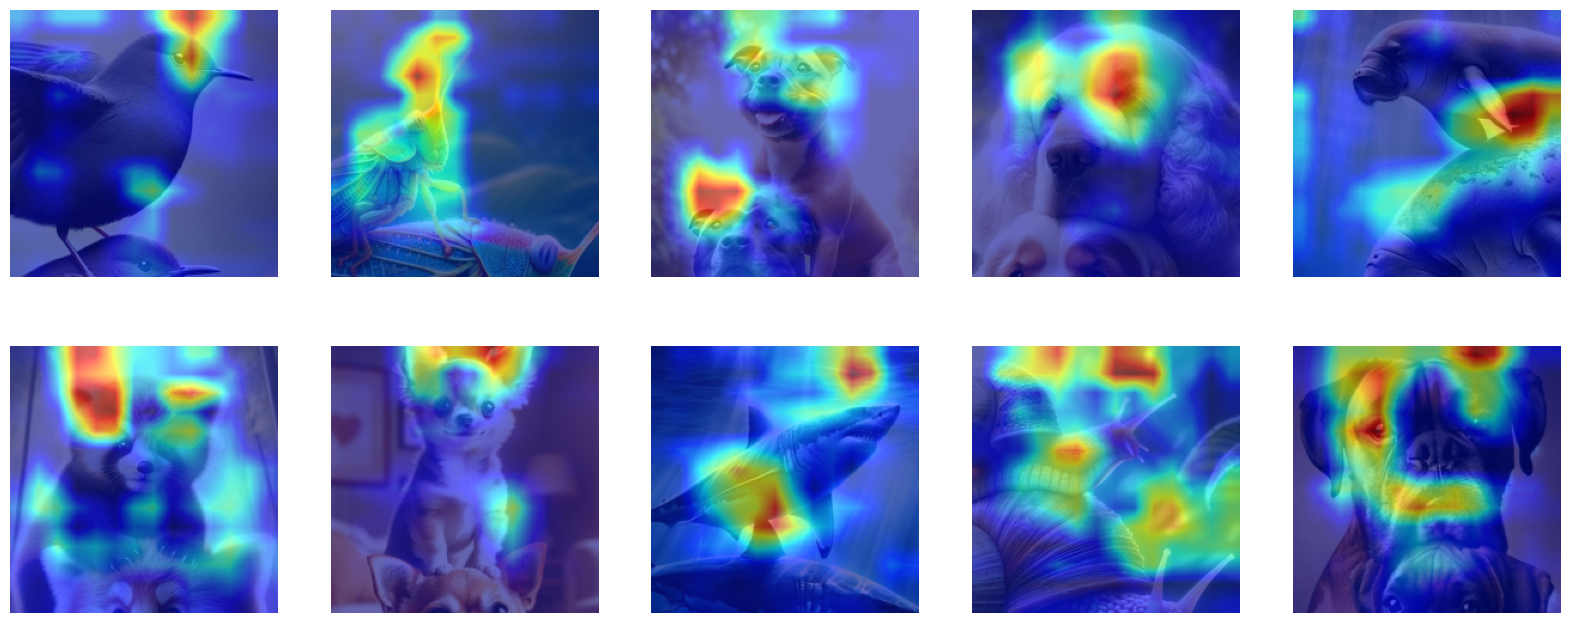

In [7]:
# Visualizing more results

# plotting 10 random saliency maps from STACK-GEN
heatmap.plot_10_random_heatmaps(my_heatmaps, my_data)

In [8]:
# Computing metrics

# convert heatmap to tensor
grayscale_heatmap = torch.tensor(my_heatmap)

# l2-norm of dead zone divided by whole l2-norm of saliency map as in Table 1 of the paper
norms = torch.norm(grayscale_heatmap[:, -54:, :], dim = (1,2)) / torch.norm(grayscale_heatmap, dim = (1,2))

print(f"activation in the deadzone: mean = {torch.mean(norms).item():.2f}, std = {torch.std(norms).item():.2f}")

NameError: name 'my_heatmap' is not defined